In [1]:
#import/install needed modules/packages
!pip install seaborn -q
!pip install colorama -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from colorama import Fore
#from IPython.display import Markdown as md

#statistical analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, silhouette_score

### Question 1: Import Data and EDA

In [2]:
#import data from file
datHousing = pd.read_csv('Housing.csv')
datHousing.head()

,CRIM,ZN,INDUS,RIVER,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
0,3.32105,0.0,19.58,Yes,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4
1,1.12658,0.0,19.58,Yes,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3
2,1.41385,0.0,19.58,Yes,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0
3,3.53501,0.0,19.58,Yes,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6
4,1.27346,0.0,19.58,Yes,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0


### Relationship Between MEDV and Numerical Features

In [3]:
#define numeric features
num_features = np.delete(datHousing.columns.values, np.where(datHousing.columns.values=='RIVER'))

#review distribution of numeric features
datHousing[num_features].corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536
PRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787


- ***MEDV*** most correlated with ***LSTAT*** (% of lower status population), ***RM*** (average number of rooms per dwelling), and ***PRATIO*** (pupil teacher ratio by town)
- Previously thought to remove ***RAD*** (radial highways accessibility index) because it is highly correlated with tax, but not as much with ***MEDV***. See below

In [4]:
datHousing[['MEDV', 'TAX', 'RAD']].corr()

,MEDV,TAX,RAD
MEDV,1.000000,-0.468536,-0.381626
TAX,-0.468536,1.000000,0.910228
RAD,-0.381626,0.910228,1.000000


With ***RAD*** removed, our correlation levels look like this

In [5]:
(datHousing[np.delete(num_features, np.where(num_features=='RAD'))]).corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,-0.496996,0.249929
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,0.543993,-0.468536
PRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,0.374044,-0.507787
LSTAT,0.455621,-0.412995,0.603800,0.590879,-0.613808,0.602339,-0.496996,0.543993,0.374044,1.000000,-0.737663


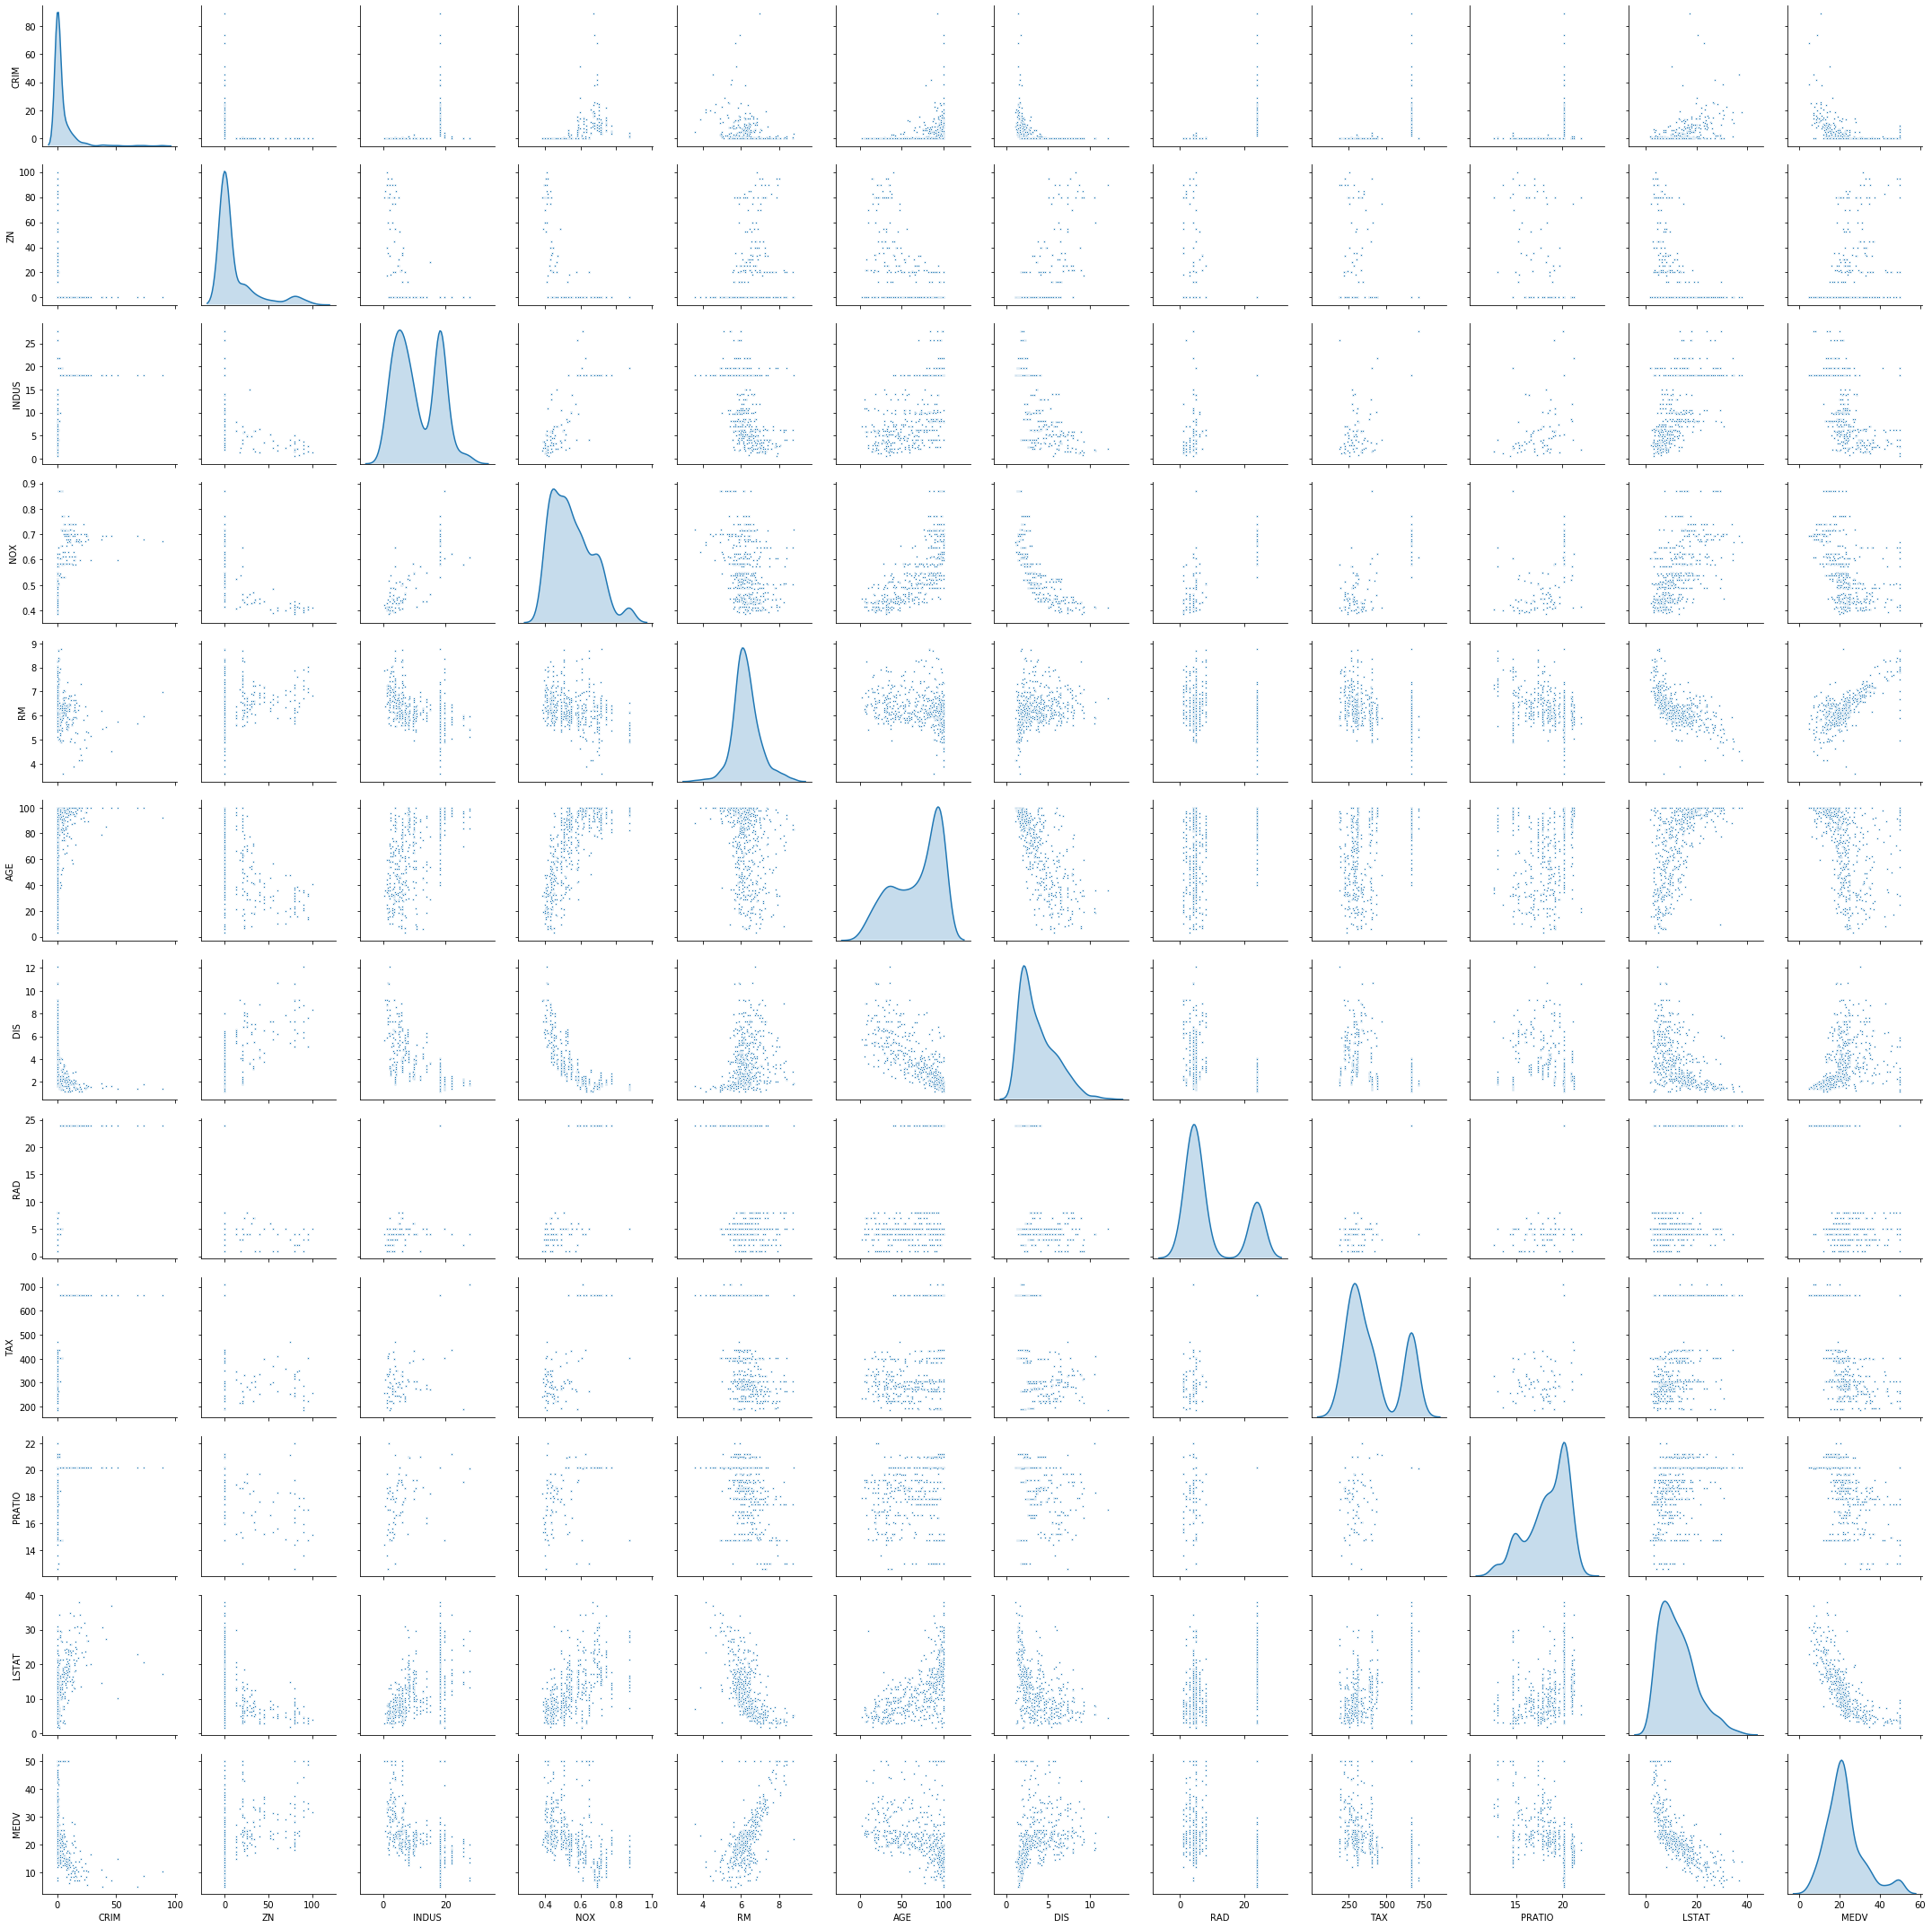

In [6]:
sns.pairplot(datHousing[num_features], plot_kws={'s':5}, diag_kind='kde')

From above, the same variables have the same strength relationships with median home value. Now, we can look at the relationship between **MEDV** and the categorical feature **RIVER** (proximity of a dwelling to the Charles River).

#### Relationship between MEDV and RIVER (categorical feature)

Text(0.5, 1.0, 'Relationship between MEDV and River Proximity')

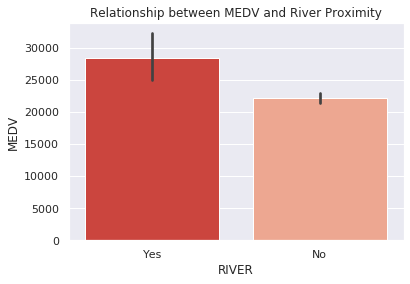

In [7]:
#plot categorical value relationship with median home price
sns.set(style='darkgrid')
sns.barplot(datHousing['RIVER'], datHousing['MEDV']*1000, palette='Reds_r')
plt.title('Relationship between MEDV and River Proximity')

### Question 2: Recoding Category RIVER

In [8]:
#create dummy variable and remove the old recoded category
river = pd.get_dummies(datHousing['RIVER'], prefix='RIVER', drop_first=True)
datHousing = pd.concat([datHousing.drop(['RIVER'], axis=1), river], axis=1)

In [9]:
datHousing.rename(columns={'RIVER_Yes': 'RIVERCODE'}, inplace=True)
datHousing.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV,RIVERCODE
0,3.32105,0.0,19.58,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4,1
1,1.12658,0.0,19.58,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3,1
2,1.41385,0.0,19.58,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0,1
3,3.53501,0.0,19.58,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6,1
4,1.27346,0.0,19.58,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0,1


In [10]:
print('To verify, the mean of ***RIVERCODE*** is {}'.format(datHousing['RIVERCODE'].mean().round(3)))

To verify, the mean of ***RIVERCODE*** is 0.069


### Question 3: Baseline model predicting median home value
\begin{align*}
\hat{MEDV_i} & = f(CRIM, ZN, INDUS, NOX , RM, AGE, DIS, RAD, TAX, PRATIO, LSTAT, RIVERCODE, \varepsilon_i)
\end{align*}

In [11]:
#method to run regression and get coefficients and measures
def linear_reg(data, model_name, drop):
    #Regression instance
    reg = LinearRegression()
    #define X and Y variables
    X = data.drop(drop, axis=1)
    Y = data['MEDV']

    #fit data to the regression
    reg.fit(X, Y)
    #predictions
    y_pred = reg.predict(X)    
    #Calculate model measures
    mse = mean_squared_error(Y, y_pred)
    rsquare = r2_score(Y, y_pred)
    
    #Display measures and coefficients
    print('\033[1m{}\033[0m'.format(model_name))
    print('Mean squared error: {}\nR-Squared: {}'.format(mse.round(5), rsquare.round(5)))
    coefs = pd.DataFrame(pd.Series(reg.coef_, index=X.columns).sort_values(ascending=False).round(5))
    coefs.rename(columns={0:'Coefs- {}'.format(model_name)}, inplace=True)
    return coefs
    
#run base model with all data
baseline = linear_reg(datHousing, 'Baseline Model:', ['MEDV'])
baseline

Baseline Model:
Mean squared error: 22.42968
R-Squared: 0.73431


,Coefs- Baseline Model:
RM,3.65812
RIVERCODE,2.83999
RAD,0.28940
ZN,0.04696
INDUS,0.01347
AGE,0.00361
TAX,-0.01268
CRIM,-0.12139
LSTAT,-0.55202
PRATIO,-0.93753


### Question 4: Prepare Clustering Data Subset

In [12]:
#get dataframe of all but y variable
datHousingSub = datHousing.drop(['MEDV'], axis=1)
datHousingSub.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,RIVERCODE
0,3.32105,0.0,19.58,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,1
1,1.12658,0.0,19.58,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,1
2,1.41385,0.0,19.58,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,1
3,3.53501,0.0,19.58,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,1
4,1.27346,0.0,19.58,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,1


### Question 5: Create Two-Cluster Model

In [13]:
#import modules
from sklearn.cluster import KMeans

#Specify number of clusters and fit the data
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(datHousingSub)

#save the centroids for each cluster
centroids = pd.DataFrame((kmeans2.cluster_centers_).transpose(), index=[datHousingSub.columns.values])
centroids
#zero seems closer to a residential area/ 1 seems like a apartment development close to the city area

,0,1
CRIM,0.388774,1.229916e+01
ZN,15.582656,3.019807e-14
INDUS,8.420894,1.845182e+01
NOX,0.511847,6.701022e-01
RM,6.388005,6.006212e+00
AGE,60.632249,8.996788e+01
DIS,4.441272,2.054470e+00
RAD,4.455285,2.327007e+01
TAX,311.926829,6.676423e+02
PRATIO,17.809214,2.019635e+01


**Based on the most divergent variables between the two clusters** (proximity to the Charles River, non-retail activity, age of establishments, proportion of residential land zoned plots, nitric oxides concentration, pupil-teacher ratio, and full value property-tax rate),   
Cluster 0 -> suburb/residential area  
Cluster 1 -> apartment complex/city area

### Question 6: Create Three-Cluster Model

In [14]:
#Specify number of clusters and fit the data
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(datHousingSub)

#save the centroids for each cluster
centroids = pd.DataFrame((kmeans3.cluster_centers_).transpose(), index=[datHousingSub.columns.values])
centroids

,0,1,2
CRIM,0.244206,1.229916e+01,0.747469
ZN,17.376426,3.019807e-14,11.132075
INDUS,6.702624,1.845182e+01,12.684151
NOX,0.484714,6.701022e-01,0.579170
RM,6.474163,6.006212e+00,6.174236
AGE,56.166160,8.996788e+01,71.713208
DIS,4.835798,2.054470e+00,3.462400
RAD,4.326996,2.327007e+01,4.773585
TAX,275.212928,6.676423e+02,403.018868
PRATIO,17.873384,2.019635e+01,17.650000


In [15]:
#check silhouette scores
print('With {} clusters, the silhouette score is {}'.format(2, silhouette_score(datHousingSub, kmeans2.labels_).round(5)))
print('With {} clusters, the silhouette score is {}'.format(3, silhouette_score(datHousingSub, kmeans3.labels_).round(5)))

With 2 clusters, the silhouette score is 0.7718
With 3 clusters, the silhouette score is 0.62175


From looking at the silhouette scores from the clusters, it is better to have two than three clusters; indicating that another cluster did not help provide a meaningful partition of the data. Additionally, some of the centroids for the different features are much less differentiated. For example, ***PRATIO*** has almost the same centroid value for the 1st and 3rd clusters compared to the 2nd one. The same can be observed for ***RM, NOX, RAD, LSTAT,*** and ***RIVERCODE***, where two of the three centroids are much closer to each other than the other one.


### Question 7: Move on with Two-Cluster Model

In [16]:
#merge the two clusters into the larger dataset as an ID-Cluster
#create a dataframe of the cluster IDs
clusters = pd.DataFrame(kmeans2.labels_)
#merge into the larger dataset and rename cluster ID column
datHousingC = pd.concat([datHousing, clusters], axis=1)
datHousingC.rename(columns = {0:'Cluster'}, inplace=True)
#view data
datHousingC.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,LSTAT,MEDV,RIVERCODE,Cluster
0,3.32105,0.0,19.58,0.871,5.403,100.0,1.3216,5,403,14.7,26.82,13.4,1,0
1,1.12658,0.0,19.58,0.871,5.012,88.0,1.6102,5,403,14.7,12.12,15.3,1,0
2,1.41385,0.0,19.58,0.871,6.129,96.0,1.7494,5,403,14.7,15.12,17.0,1,0
3,3.53501,0.0,19.58,0.871,6.152,82.6,1.7455,5,403,14.7,15.02,15.6,1,0
4,1.27346,0.0,19.58,0.605,6.250,92.6,1.7984,5,403,14.7,5.50,27.0,1,0


### Question 8: Split Cluster 1

In [17]:
#create subset dataframe for first cluster
datHousingC1 = datHousingC[datHousingC['Cluster']==0]
#verify values
print('First Cluster: C = 0')
print(datHousingC1.Cluster.describe())
#update cluster number to 1
datHousingC1.Cluster = 1

First Cluster: C = 0
count    369.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Cluster, dtype: float64


/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Question 9: Split Cluster 2

In [18]:
#create subset dataframe for second cluster
datHousingC2 = datHousingC[datHousingC['Cluster']==1]
#verify values
print('Second Cluster: C = 1')
print(datHousingC2.Cluster.describe())
#update cluster number to 2
datHousingC2.Cluster = 2

Second Cluster: C = 1
count    137.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Cluster, dtype: float64


### Question 10: Cluster 1 Regression Model
Model using same predictors as base model with only data from cluster 1

In [19]:
#run model and get measures and coefficients
cluster_1 = linear_reg(datHousingC1, 'Cluster One:', ['MEDV', 'Cluster'])
cluster_1

Cluster One:
Mean squared error: 9.64288
R-Squared: 0.86112


,Coefs- Cluster One:
RM,9.18797
RIVERCODE,0.81890
CRIM,0.78410
RAD,0.25610
INDUS,0.02251
ZN,0.01798
TAX,-0.01395
AGE,-0.05129
LSTAT,-0.06489
PRATIO,-0.62432


With the first cluster, splitting the data was helpful in predicting the median home value as the mean squared error went down, and the $R^2$ is higher, meaning more of the outcome variation is explained by the features for this segment of homes compared to the whole dataset population.

### Question 11: Cluster 2 Regression Model

In [20]:
#run model and get measures and coefficients
cluster_2 = linear_reg(datHousingC2, 'Cluster Two:', ['MEDV', 'Cluster'])
cluster_2

Cluster Two:
Mean squared error: 22.61488
R-Squared: 0.68163


,Coefs- Cluster Two:
INDUS,3.389546e+10
ZN,5.879722e+09
RIVERCODE,9.085020e+00
AGE,3.277000e-02
CRIM,-1.494600e-01
LSTAT,-8.317100e-01
RM,-1.863570e+00
DIS,-3.360060e+00
NOX,-3.729990e+01
TAX,-8.951430e+11


With the second cluster, the mean squared error is slightly higher than that of the baseline model, while the $R^2$ consequently, has gone down so less variation in median home values of this group is explained by the predictors.

### Question 12: Summary of Findings

In [21]:
#combine the three model results
models = pd.concat([baseline, cluster_1, cluster_2], axis=1, sort=True)
models.loc['MSE'] = [22.42968, 9.64288, 22.61488]
models.loc['R-Squared'] = [0.73431, 0.86112, 0.68163]
models

,Coefs- Baseline Model:,Coefs- Cluster One:,Coefs- Cluster Two:
AGE,0.00361,-0.05129,3.277000e-02
CRIM,-0.12139,0.78410,-1.494600e-01
DIS,-1.49075,-0.94618,-3.360060e+00
INDUS,0.01347,0.02251,3.389546e+10
LSTAT,-0.55202,-0.06489,-8.317100e-01
NOX,-18.75802,-9.04348,-3.729990e+01
PRATIO,-0.93753,-0.62432,-1.034813e+12
RAD,0.28940,0.25610,-1.992560e+12
RIVERCODE,2.83999,0.81890,9.085020e+00
RM,3.65812,9.18797,-1.863570e+00


From comparing the $R^2$ and mean squared errors: 
- It looks like ***the first cluster is a better fit for this model*** and its features to predict median home value compared to the baseline and $2^{nd}$ cluster. For the more residential/suburban cluster of homes, clustering improved the predictive ability of our $1^{st}$ cluster's model. 
- **However, when we look at the scores for the second cluster,** it is still not specialized enough to give a consistent level of variation based on the model because ***the model was worse on that subset of data compared to the baseline model***. It may be helpful to look at the $2^{nd}$ cluster as another full dataset and try to split it into clusters to see if there are more centroids to establish that might improve our ability to predict $MEDV$. 
- Also depending on the cluster, ***different features have different predictive power for each cluster and should not be weighted the same during modeling***. Clustering helps identify how to interpret these differences. For example, the proximity to Charles River is more powerful in predicting home value in the $2^{nd}$ cluster compared to the $1^{st}$ cluster and baseline models. The same can be said for the proportion of residential zoned land, and percentage of lower status population among others.

In [22]:
#Specify number of clusters and fit the data
test = datHousingC2.drop(['Cluster'], axis=1)
kmeans_test = KMeans(n_clusters=2, random_state=0).fit(test)

#save the centroids for each cluster
centroids_test = pd.DataFrame((kmeans_test.cluster_centers_).transpose(), index=[test.columns.values])
centroids_test

,0,1
CRIM,6.010706,16.517029
ZN,0.000000,0.000000
INDUS,18.450545,18.452683
NOX,0.653873,0.680988
RM,6.145818,5.912573
AGE,80.220000,96.506098
DIS,2.466204,1.778307
RAD,23.272727,23.268293
TAX,667.636364,667.646341
PRATIO,20.196364,20.196341


When the second cluster is split, we see although a few of the predictors do not separate out much more, there is a relatively big difference between the centroids for crime rate, proportion of buildings up before 1940, percentage of lower status population, and more interestingly, the median home value. We therefore get a little bit more information from clustering that helps us understand how to use the variables we have meaningfully when thinking of how to model prediction of median home value. 